<h1>Projekt 1: Monte Carlo</h1>

<h3>Importowanie potrzebnych bibliotek </h3>

In [2]:
import random
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

<h3>Zdefiniowanie funkcji Monte Carlo</h3>

In [3]:
# tworzy randomowe współrzędne
def Draw_coordinates(n):
    
    x_random = []
    y_random = []
    for i in range(0, n):
        x_random.append( random.uniform(0, 1) )
        y_random.append( random.uniform(0, 1) )
        
    coordinates= pd.DataFrame({ "X" : x_random, "Y" : y_random })
    
    return coordinates
    
# szacuje wartość pi na podstawie otrzymanych punktów
def PI(coordinates):
    hitted = sum(  coordinates["X"] ** 2 + coordinates["Y"] ** 2 <= 1 )
    return hitted / len(coordinates) * 4
    
# łączy funkcje Draw_coordinates i PI
def Monte_Carlo(n):
    coo  = Draw_coordinates(n)
    pi = PI(coo)
    return  pi

<h3>Testowanie funkcji</h3>

In [4]:
coordinates = Draw_coordinates(1000)
PI(coordinates)
Monte_Carlo(100)

3.12

<h3>Funkcje pomocnicze do wykresów obrazujących punkty</h3>

In [5]:
def within(coordinates):
    R = coordinates[ coordinates["X"] ** 2 + coordinates["Y"] ** 2 <= 1 ]
    return R

def outside(coordinates):
    R = coordinates[ coordinates["X"] ** 2 + coordinates["Y"] ** 2 > 1 ]
    return R

<h3>Wykresy</h3>

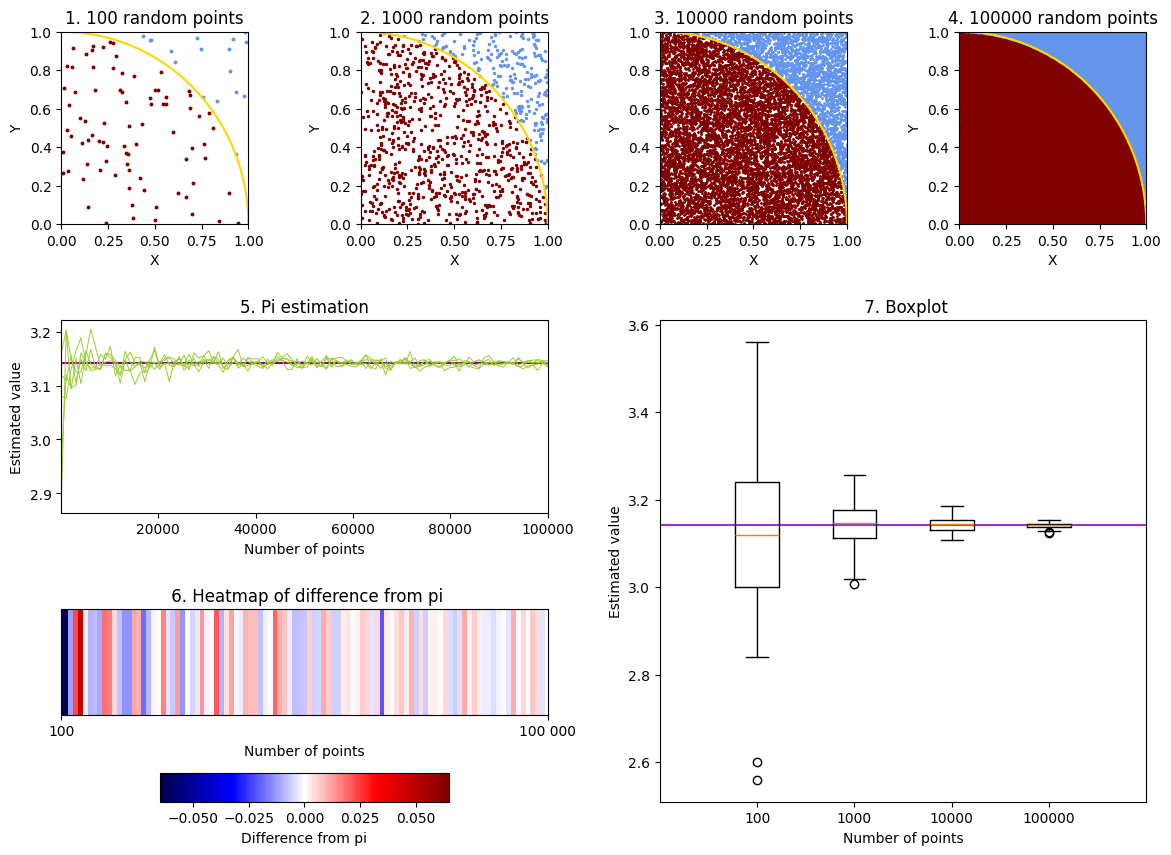

In [6]:
random.seed(12)

plt.figure(figsize=(14, 10))

numbers_of_points = [100, 1000, 10000, 100000]

alfa = np.linspace(0, np.pi / 2, 100)
x = np.cos(alfa)
y = np.sin(alfa)

# wykresy obrazujące punkty pod i nad wykresem
for num in range( len( numbers_of_points ) ):
    ax = plt.subplot(3,4,num+1)
    coors = Draw_coordinates( numbers_of_points[num] )
    tmp_within = within(coors)
    tmp_outside = outside(coors)
    ax.scatter(tmp_within["X"], tmp_within["Y"], s=3.2-num, color='maroon')
    ax.scatter(tmp_outside["X"], tmp_outside["Y"], s=3.2-num, color='cornflowerblue')
    ax.plot(x,y, color="gold")
    ax.set_ylim([0,1])
    ax.set_xlim([0,1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f"{num+1}. {numbers_of_points[num]} random points")
    

# wykres obrazujący szacowną wartość pi podczas zwiekszania liczby strzałów
numbers_of_points_2 = np.linspace(100, 100000, 100).astype(int)

ax = plt.subplot2grid(shape=(3, 4), loc=(1, 0), colspan=2)

ax.plot([100, 100000], [np.pi, np.pi], color="darkmagenta")

for i in range(5):
    pi=[]
    for num in range( len( numbers_of_points_2 ) ):
        pi.append(Monte_Carlo(numbers_of_points_2[num]))
    ax.plot(numbers_of_points_2, pi, linewidth=0.7, color="yellowgreen")
    
ax.set_xlim([100, 100000])
ax.set_title("5. Pi estimation")
ax.set_xlabel('Number of points')
ax.set_ylabel('Estimated value')


# heatmap
ax = plt.subplot2grid(shape=(3, 4), loc=(2, 0), colspan=2)
START=0
array_pi = np.array(pi[START:])
array_pi = (array_pi - np.pi)

im = ax.imshow([array_pi],aspect="auto",  cmap='seismic', vmin=-np.max(np.abs(array_pi)), vmax=np.max(np.abs(array_pi)))
ax.set_xlim(0, len(pi)-START)
ax.set_xticks([0,len(pi)-START])
ax.set_xticklabels([f"{numbers_of_points_2[START]}", "100 000"])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_title(" 6. Heatmap of difference from pi")
ax.set_xlabel('Number of points')

cbar = plt.colorbar(im, ax=ax, aspect=10, orientation='horizontal', pad=0.3)
cbar.set_label('Difference from pi')
    
# boxplot
data_for_bplot=[]
for num in numbers_of_points:
    tmp=[]
    for i in range(100):
        tmp.append(Monte_Carlo(num))
    data_for_bplot.append(tmp)
    
ax = plt.subplot2grid(shape=(3, 4), loc=(1, 2), colspan=2, rowspan=2)

ax.hlines(np.pi, xmin=0, xmax=5, color='darkorchid')
bplot = ax.boxplot(data_for_bplot, vert=True, labels=numbers_of_points)
ax.set_xlim([0, 5])
ax.set_title(" 7. Boxplot")
ax.set_xlabel('Number of points')
ax.set_ylabel('Estimated value')

plt.subplots_adjust(hspace=0.5, wspace=0.6)
plt.show()


In [7]:

for i in [0,1,2,3]:
    print(f'ilość "strzałów": {numbers_of_points[i]}\nStatystyki:')
    print(f' min: {min(data_for_bplot[i])}', end='\t')
    print(f'lower cap: {bplot["caps"][i*2].get_ydata()[1]} ', end='\t')
    print(f'quantile 0.25: {bplot["boxes"][i].get_ydata()[1]} ', end='\t')
    print(f'median: {bplot["medians"][i].get_ydata()[1]} ', end='\t')
    print(f'quantile 0.75: {bplot["boxes"][i].get_ydata()[2]} ', end='\t')
    print(f'upper cap: {bplot["caps"][i*2+1].get_ydata()[1]} ', end='\t')
    print(f'max: {max(data_for_bplot[i])}')
    print("\n")

ilość "strzałów": 100
Statystyki:
 min: 2.56	lower cap: 2.84 	quantile 0.25: 3.0 	median: 3.12 	quantile 0.75: 3.24 	upper cap: 3.56 	max: 3.56


ilość "strzałów": 1000
Statystyki:
 min: 3.008	lower cap: 3.02 	quantile 0.25: 3.112 	median: 3.146 	quantile 0.75: 3.176 	upper cap: 3.256 	max: 3.256


ilość "strzałów": 10000
Statystyki:
 min: 3.1072	lower cap: 3.1072 	quantile 0.25: 3.1316 	median: 3.1448 	quantile 0.75: 3.154 	upper cap: 3.1868 	max: 3.1868


ilość "strzałów": 100000
Statystyki:
 min: 3.12416	lower cap: 3.1294 	quantile 0.25: 3.13843 	median: 3.14168 	quantile 0.75: 3.14507 	upper cap: 3.1542 	max: 3.1542


